In [1]:
# Miscellaneous Packages
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mnist import MNIST
from sklearn.externals import joblib
import random

# ML Packages
from scipy import stats
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.datasets import fetch_mldata

In [4]:
def prepare_data():
    mnist = fetch_mldata('MNIST original', data_home='./')
    mnist.keys()

    images = mnist.data
    targets = mnist.target

    X_data = images
    Y = targets
    shuf = random.sample(range(len(X_data)), 2500)

    X_train = []
    for x in shuf: X_train.append(X_data[x])

    y_train = []
    for x in shuf: y_train.append(Y[x])

    c_shuf = set(range(len(X_data))) - set(shuf)

    X_test = []
    for x in c_shuf: X_test.append(X_data[x])

    y_test = []
    for x in c_shuf: y_test.append(Y[x])

    return X_train, X_test, y_train, y_test

In [4]:
train_nums, test_nums, train_labels, test_labels = prepare_data()

In [5]:
# SVM
sv = svm.SVC(kernel = 'poly')
sv.fit(train_nums, train_labels)
svm_accuracy = sum(sv.predict(test_nums) == test_labels)/len(test_nums)
print(svm_accuracy)

0.923096296296


In [ ]:
# Gaussian Process Classifier
gp = GaussianProcessClassifier(kernel = RBF(length_scale = 1.0), n_jobs = 4, multi_class = 'one_vs_rest')
gp.fit(train_nums, train_labels)
gp_accuracy = sum(gp.predict(test_nums) == test_labels)/len(test_labels)
print(gp_accuracy)

In [ ]:
# Guassian Quadratic
kernelQuad = RationalQuadratic()
gp_Quad = GaussianProcessClassifier(multi_class = 'one_vs_rest', 
                              kernel = kernelQuad, n_jobs = -1)
gp_Quad.fit(train_nums[:2500], train_labels[:2500])
gp_Quad_accuracy = sum(gp_Quad.predict(test_nums) == test_labels)/len(test_labels)

In [ ]:
# Guassian Dot Product
kerneldot = DotProduct()
gp_dot = GaussianProcessClassifier(multi_class = 'one_vs_rest', 
                              kernel = kerneldot, n_jobs = -1)
gp_dot.fit(train_nums[:2500], train_labels[:2500])
gp_dot_accuracy = sum(gp_dot.predict(test_nums) == test_labels)/len(test_labels)

In [ ]:
# Multilayer Perceptron Neural Network
mlp = MLPClassifier(alpha = 1, max_iter = 10000)
mlp.fit(train_nums[:2500], train_labels[:2500])
mlp_accuracy = sum(mlp.predict(test_nums) == test_labels)/len(test_nums)

In [ ]:
# Quadratic Discriminant Analysis
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_nums[:2500], train_labels[:2500])
knn_accuracy = sum(knn.predict(test_nums) == test_labels)/len(test_nums)

In [12]:
print("SVM:",svm_accuracy, "\n", "KNN:",knn_accuracy, "\n", 
     "MLP:",mlp_accuracy, "\n")

NameError: name 'mlp_accuracy' is not defined

In [15]:
print(knn_accuracy)

0.9068


In [7]:
gpq_predictions = gp_Quad.predict(test_nums)
svm_predictions = sv.predict(test_nums)

9215

In [8]:
gpq_correct = (gpq_predictions == test_labels)
svm_correct = (svm_predictions == test_labels)

In [56]:
list(svm_correct[9:]).index(False)

45

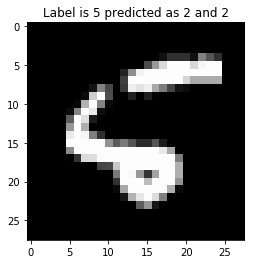

In [49]:
label = test_labels[8]
pixels = test_nums[8]
gpq_bad = gpq_predictions[8]
svm_bad = svm_predictions[8]
pixels = pixels.reshape((28,28))
plt.title('Label is {label} predicted as {gpq_bad} and {svm_bad}'.format(label=label, 
                                                                         gpq_bad = gpq_bad,
                                                                         svm_bad = svm_bad))
plt.imshow(pixels, cmap='gray')
plt.show()

In [62]:
gpq_correct[1]

True

In [59]:
svm_correct[9+45]

True

In [76]:
list(svm_correct[100:]).index(False)

15

In [97]:
# Saves images where SVM and GPQ got it wrong

both_incorrect = np.where(np.logical_and(svm_correct == False, gpq_correct == False))
for i in both_incorrect[0]:
    label = test_labels[i]
    pixels = test_nums[i]
    gpq_bad = gpq_predictions[i]
    svm_bad = svm_predictions[i]
    pixels = pixels.reshape((28,28))
    plt.title('Label is {label} predicted as GPQ:{gpq_bad} and SVM:{svm_bad}'.format(label=label, 
                                                                         gpq_bad = gpq_bad,
                                                                         svm_bad = svm_bad))
    name = "bothfalse" + str(i) + ".png"
    plt.imshow(pixels, cmap='gray')
    plt.savefig(name)

In [102]:
# Saves images where SVM got it right and GPQ got it wrong

svm_true_gpq_false = np.where(np.logical_and(svm_correct == True, gpq_correct == False))
for i in svm_true_gpq_false[0]:
    label = test_labels[i]
    pixels = test_nums[i]
    gpq_bad = gpq_predictions[i]
    svm_bad = svm_predictions[i]
    pixels = pixels.reshape((28,28))
    plt.title('Label is {label} predicted as GPQ:{gpq_bad} and SVM:{svm_bad}'.format(label=label, 
                                                                         gpq_bad = gpq_bad,
                                                                         svm_bad = svm_bad))
    name = "SVMtrueGPQfalse" + str(i) + ".png"
    plt.imshow(pixels, cmap='gray')
    plt.savefig(name)

In [106]:
# Saves images where SVM got it wrong and GPQ got it right

svm_false_gpq_true = np.where(np.logical_and(svm_correct == False, gpq_correct == True))
for i in svm_false_gpq_true[0]:
    label = test_labels[i]
    pixels = test_nums[i]
    gpq_bad = gpq_predictions[i]
    svm_bad = svm_predictions[i]
    pixels = pixels.reshape((28,28))
    plt.title('Label is {label} predicted as GPQ:{gpq_bad} and SVM:{svm_bad}'.format(label=label, 
                                                                         gpq_bad = gpq_bad,
                                                                         svm_bad = svm_bad))
    name = "SVMfalseGPQtrue" + str(i) + ".png"
    plt.imshow(pixels, cmap='gray')
    plt.savefig(name)

In [107]:
# Saves 200 images where both got it right

both_true = np.where(np.logical_and(svm_correct == True, gpq_correct == True))

for i in both_true[0]:
    label = test_labels[i]
    pixels = test_nums[i]
    gpq_bad = gpq_predictions[i]
    svm_bad = svm_predictions[i]
    pixels = pixels.reshape((28,28))
    plt.title('Label is {label} predicted as GPQ:{gpq_bad} and SVM:{svm_bad}'.format(label=label, 
                                                                         gpq_bad = gpq_bad,
                                                                         svm_bad = svm_bad))
    name = "bothtrue" + str(i) + ".png"
    plt.imshow(pixels, cmap='gray')
    plt.savefig(name)

KeyboardInterrupt: 

In [3]:
targets[targets== 2]

NameError: name 'targets' is not defined

In [5]:
train_nums, test_nums, train_labels, test_labels = prepare_data()

In [6]:
train_labels[train_labels == 2]

2.0

In [8]:
indexes = [i for i,x in enumerate(train_labels) if x == 2]

In [12]:
twos = [train_nums[i] for i in indexes]

In [15]:
avg_two = sum(twos)/len(twos)

sum_twos = twos[0]
for (i in range(1,len(twos[i] +1))):
    

In [70]:
for nums in range(10): 
    index = [i for i,x in enumerate(train_labels) if x == nums]
    values = [train_nums[i] for i in index]
    avg_num = np.sum(values, axis = 0)/len(values)
    avg_num = avg_num.reshape((28,28))
    plt.title('Average {value}'.format(value = nums))
    name = "Average" + str(nums) + ".png"
    plt.imshow(avg_num, cmap = "gray")
    plt.savefig(name)

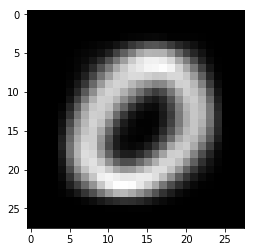

In [69]:
plt.imshow(avg_num, cmap = "gray")
plt.show()

In [46]:
np.sum(values)

7386718

In [61]:
twos = np.matrix(twos)
np.sum(twos, axis = 0)

matrix([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,    38,   236,   161,
           379,   257,    55,     0,     0,     0,   128,   151,    45,
             2,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,    50,   187,
           139,   243,   194,   518,   693,  1038,  1192,  1146,  1340,
           939,   407,   416,   338,    41,     2,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,   147,
           153,   281,   492,  1305,  3046,  4947,  6330,  7647,  7692,
          7715,  6921,  5603,  4269,  3850,  2477,   820,    66,     0,
             0,     0,     0,     0,     0,     0,     0,     0,   102,
           262,   685,  1564,  3154,  6488, 11610, 16461, 19933,

In [37]:
sums = 0
for i in range(len(twos)):
    sums = sums + twos[i][300]

In [38]:
sums

19276

In [51]:
type(twos[0])

numpy.ndarray